# StyleGAN Implementation

### Dataset Used: Flickr-Faces-HQ Dataset (FFHQ)  |  Pre-trained networks

In [4]:
!git clone https://github.com/NVlabs/stylegan.git

In [5]:
cd stylegan

/content/gdrive/My Drive/styleGAN_implementation/stylegan


In [6]:
!pip install --upgrade pip==20.2

#!pip install tensorflow==1.15.5  #CPU
!pip install tensorflow-gpu==1.15  #GPU

Requirement already up-to-date: pip==20.2 in /usr/local/lib/python3.7/dist-packages (20.2)


In [8]:
import tensorflow as tf
if tf.test.gpu_device_name():
 print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
 print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [9]:

# Loading Generator
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config



# Initialize TensorFlow.
tflib.init_tf()

# Load pre-trained network. The pre-trained networks are stored as standard pickle files on Google Drive
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl

with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
    _G, _D, Gs = pickle.load(f)
    #To generate images, you will use Gs – the other two networks are provided for completeness. #You can ignore _G and _D














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
#Select a latent vector
# Pick latent vector.
rnd = np.random.RandomState(400)
latents = rnd.randn(1, Gs.input_shape[1])

#Different images can be generated by changing the RandomState value (200 in the above code) set when selecting the latent vector.

In [11]:
# Generate image.
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

#You can change the value of truncation_psi (0.7 in the above code), between -1 and 1. 

#All face images at the beginning were generated with truncation_psi = 0.7
# Let's say if you set it to 3 or some other big number, then generated images will be too far from the real image and it will be a strange image.　

In [12]:
#!nvidia-smi

In [13]:
# Save image.
os.makedirs(config.result_dir, exist_ok=True)
png_filename = os.path.join(config.result_dir, 'example200.png')
PIL.Image.fromarray(images[0], 'RGB').save(png_filename)

# Set the name of the image file freely in place of'example200'and execute as it is

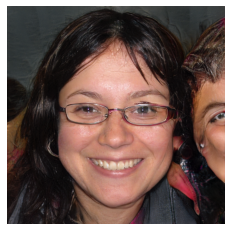

In [14]:
# Try to display the generated image on Google Colaboratory
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Do not show lines in the image
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')
#Image loading
im = Image.open("results/example200.png")
#Convert image to array
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)

plt.show()

In [15]:
# Download this image
from google.colab import files
files.download("results/example200.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>